In [20]:
import numpy as np 
import pandas as pd

import nltk
from nltk.corpus import stopwords 
import string
from wordcloud import WordCloud
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



# loading data 

In [21]:
# Load the dataset

df = pd.read_csv('/Users/surajojha/Downloads/Resume_Data.csv', encoding='ISO-8859-1')
df['Cleaned_resume']=''
df.head()

,Category,Resume,Cleaned_resume
0,NaN,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [22]:
print('Resume Categories')
print(df['Category'].value_counts())

Resume Categories
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

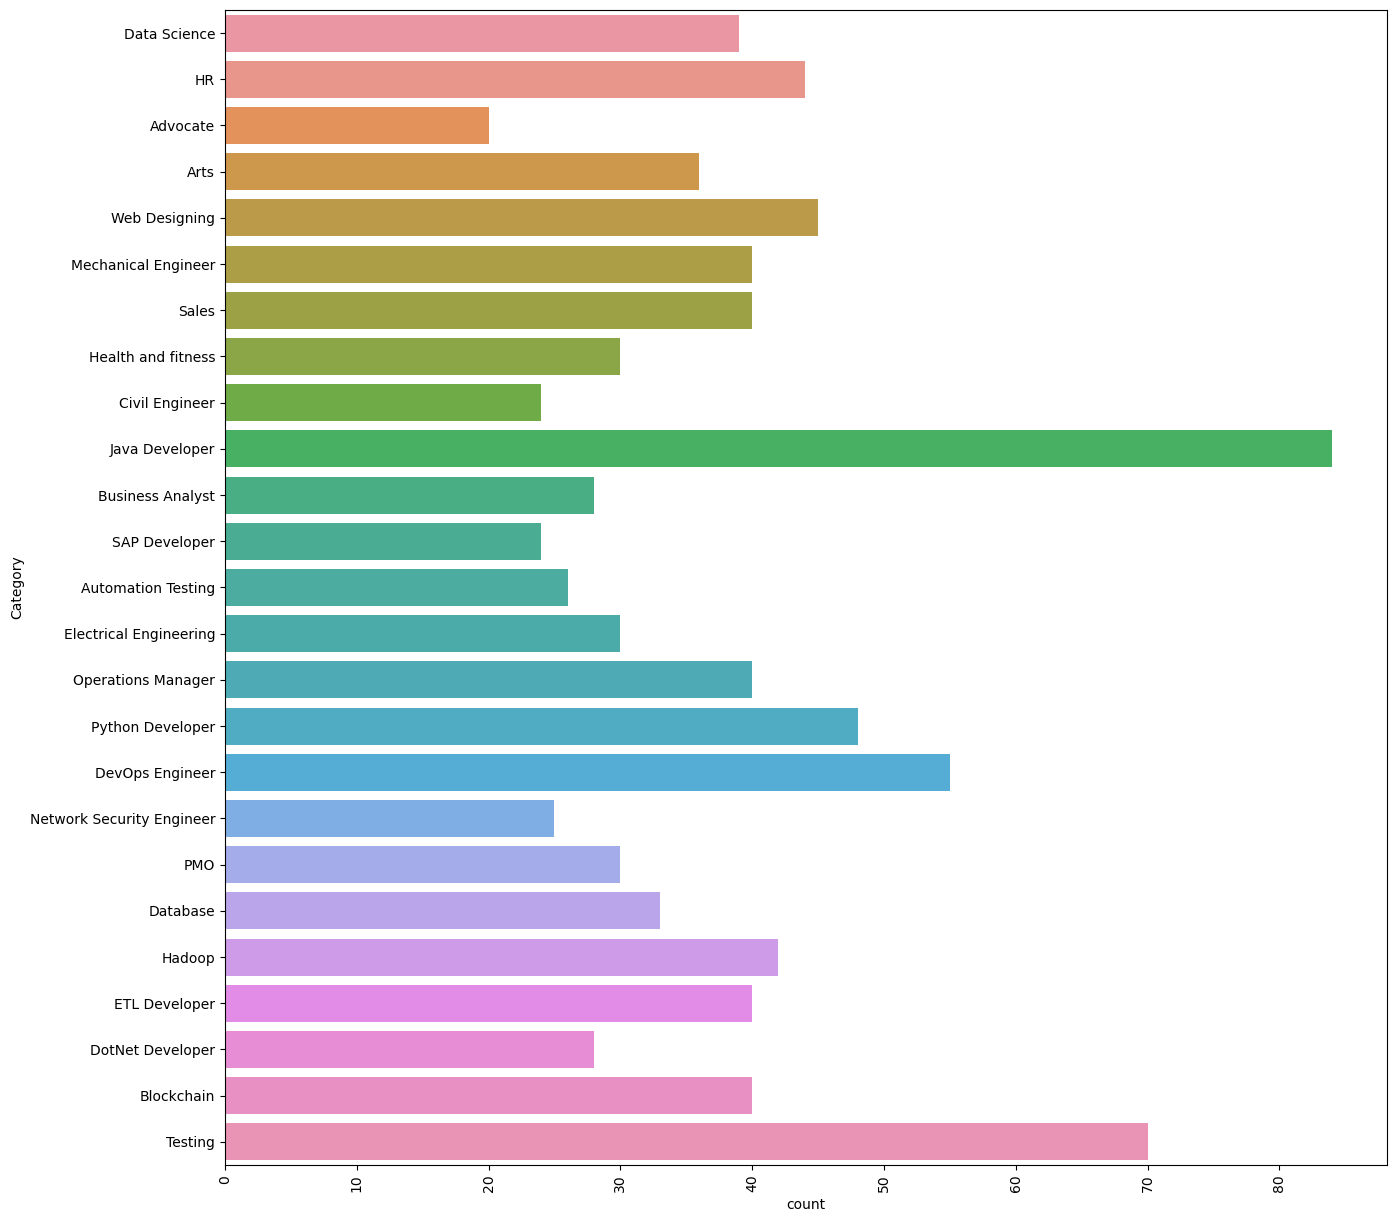

In [23]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category', data =df)

In [24]:
df['Resume'][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\nJanuary 2015    DEEKSHA CENTER\nJanuary 2013    Little Flower Public School\nAugust 2000    Manipal Academy of Higher\nDATA SCIENCE \n\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\nSkill Details \nData Analysis- Exprience - Less 

In [25]:
df['Resume'][961]

'Skill Set OS Windows XP/7/8/8.1/10 Database MYSQL, sql server 2005, 2008 & 2012 Languages Core Java Web Technology HTML, CSS Testing Manual Testing, Database Testing Other Bug tracking and reporting, End user handling.Education Details \nJanuary 2016 MCS  Pune, Maharashtra P.V.P College Pravaranagar\nJanuary 2011 HSC   A.K.Junior College\nJanuary 2009 SSC   A.K.Mahavidyalya\nJR TESTING ENGINEER \n\nJR TESTING ENGINEER - M-Tech Innovations Ltd\nSkill Details \nTESTING- Exprience - 24 months\nWINDOWS XP- Exprience - 24 months\nCSS- Exprience - 6 months\nDATABASE- Exprience - 6 months\nDATABASE TESTING- Exprience - 6 monthsCompany Details \ncompany - M-Tech Innovations Ltd\ndescription - Responsibilities â?¢     Analyzing the Testing Requirements â?¢     Preparing Test Plans, Test Scenarios â?¢     Preparing Test Cases â?¢     Executing the test cases â?¢     Tracking bugs â?¢     Coordinating developers in order to fix it â?¢     Preparing test summary reports â?¢     Reporting quality 

# Clean and Preprocess the Resume Text

In [26]:
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub(r'RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub(r'#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r'@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)  # remove non-ASCII characters
    resumeText = re.sub(r'\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))



[nltk_data] Downloading package punkt to /Users/surajojha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/surajojha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/surajojha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df.head()

,Category,Resume,Cleaned_resume,Cleaned_Resume
0,NaN,Skills * Programming Languages: Python (pandas...,,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",,Education Details MCA YMCAUST Faridabad Haryan...


In [28]:
len(df)

962

# getting the entire resume text 

In [29]:
corpus=' '
for i in range(0,962):
    corpus = corpus + df['Cleaned_Resume'][i]

In [30]:
corpus[1000:2500]

'review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANAL

In [31]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
tokens = tokenizer.tokenize(corpus)

len(tokens)

411913

In [32]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [33]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [34]:
len(words_new)

318305

# Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [35]:
len(lem_words)

318305

In [36]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


In [37]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

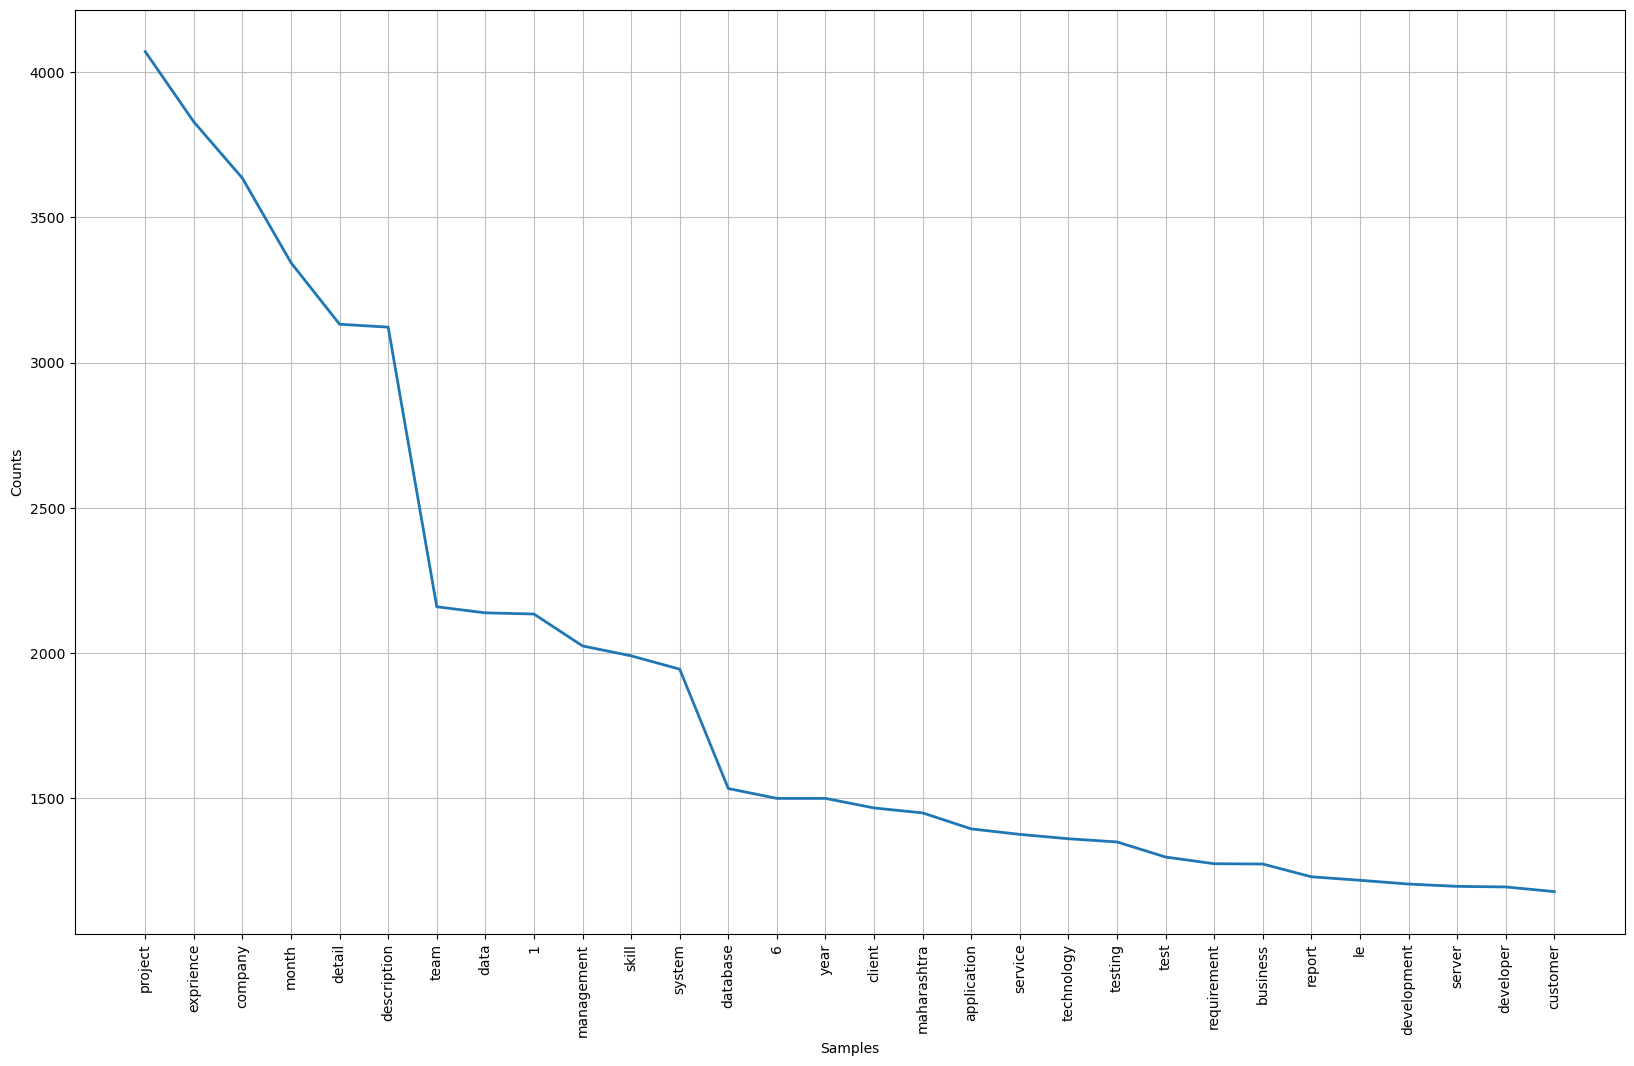

<Axes: xlabel='Samples', ylabel='Counts'>

In [38]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [61]:
len(fdist)

10121

In [65]:
mostcommon =fdist.most_common(50)

In [66]:
mostcommon

[('and', 16516),
 ('the', 10809),
 ('of', 8594),
 ('to', 7263),
 ('in', 5276),
 ('for', 5158),
 ('Exprience', 3829),
 ('with', 3773),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('a', 2842),
 ('on', 2704),
 ('description', 2634),
 ('as', 2142),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('is', 1503),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('from', 1209),
 ('than', 1182),
 ('all', 1171),
 ('by', 1145),
 ('Less', 1137),
 ('January', 1086),
 ('s', 1044),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('that', 762),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746),
 ('Pvt', 730),
 ('application', 727),
 ('System', 715)]

# WordCloud

In [40]:
#converting into string

res=' '.join([i for i in lem_words if not i.isdigit()])

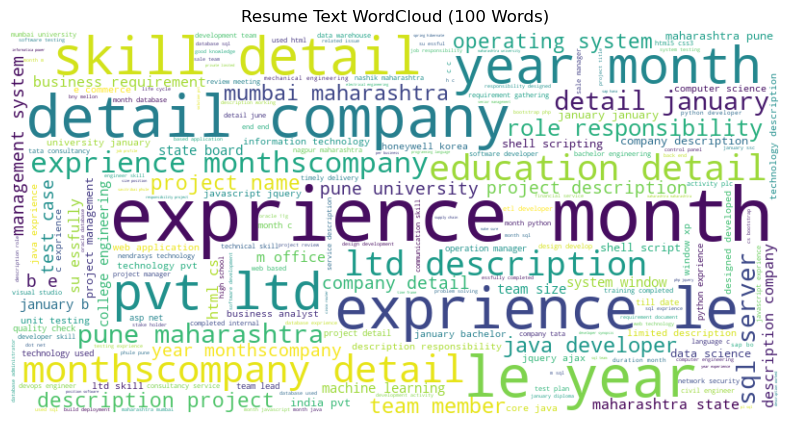

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(res)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()


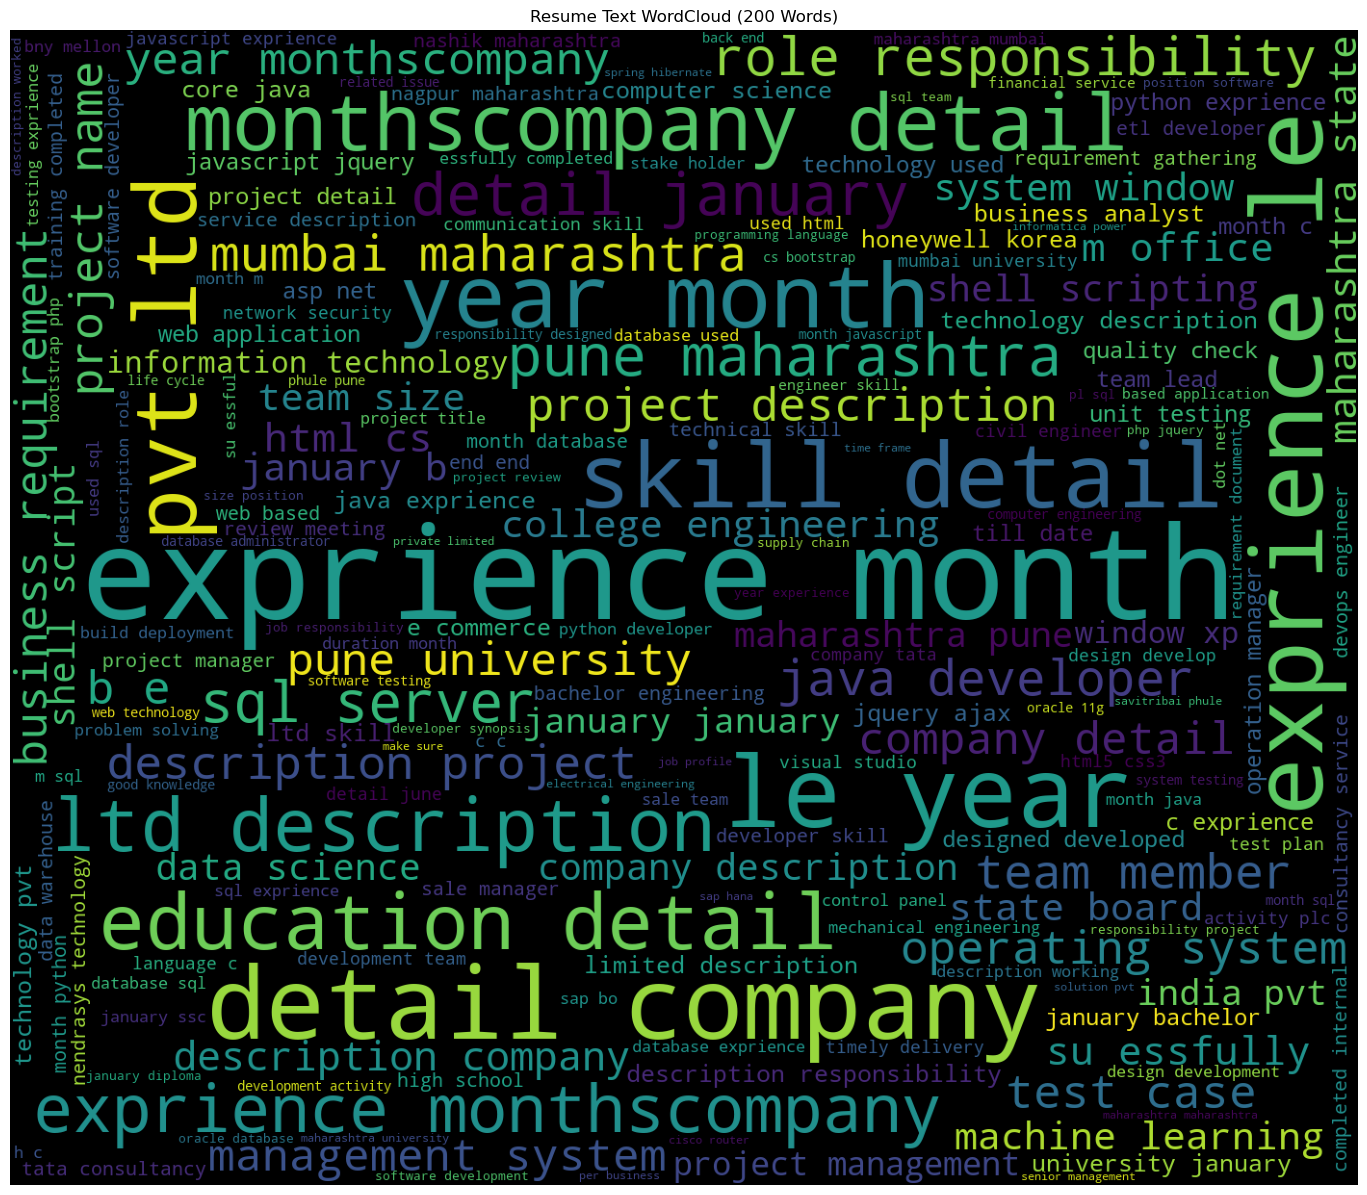

In [43]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

# Category Analys

In [47]:
data_science = df[df["Category"]=="Data Science"]


In [48]:
data_science.head()

,Category,Resume,Cleaned_resume,Cleaned_Resume
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",,Education Details MCA YMCAUST Faridabad Haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",,SKILLS C Basics IOT Python MATLAB Data Science...


In [49]:
len(data_science)

39

In [50]:
data_science["Cleaned_Resume"]

1     Education Details May 2013 to May 2017 B E UIT...
2     Areas of Interest Deep Learning Control System...
3     Skills R Python SAP HANA Tableau SAP HANA SQL ...
4     Education Details MCA YMCAUST Faridabad Haryan...
5     SKILLS C Basics IOT Python MATLAB Data Science...
6     Skills Python Tableau Data Visualization R Stu...
7     Education Details B Tech Rayat and Bahra Insti...
8     Personal Skills Ability to quickly grasp techn...
9     Expertise Data and Quantitative Analysis Decis...
10    Skills Programming Languages Python pandas num...
11    Education Details May 2013 to May 2017 B E UIT...
12    Areas of Interest Deep Learning Control System...
13    Skills R Python SAP HANA Tableau SAP HANA SQL ...
14    Education Details MCA YMCAUST Faridabad Haryan...
15    SKILLS C Basics IOT Python MATLAB Data Science...
16    Skills Python Tableau Data Visualization R Stu...
17    Education Details B Tech Rayat and Bahra Insti...
18    Personal Skills Ability to quickly grasp t

In [59]:
data_science_corpus = " "

for index, row in data_science.iterrows():
    data_science_corpus += row['Cleaned_Resume']


In [60]:
data_science_corpus


' Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github c

In [64]:
data_science_corpus=data_science_corpus.lower()

In [65]:
words_data_science=data_science_corpus.split()

{'python': 170, 'sap': 68, 'analysis': 76, 'jupyter': 4, 'education': 48, 'experience': 52, 'sql': 71, 'neural': 47, 'network': 12, 'networks': 20, 'pandas': 23, 'r': 36, 'excel': 12, 'anaconda': 4}


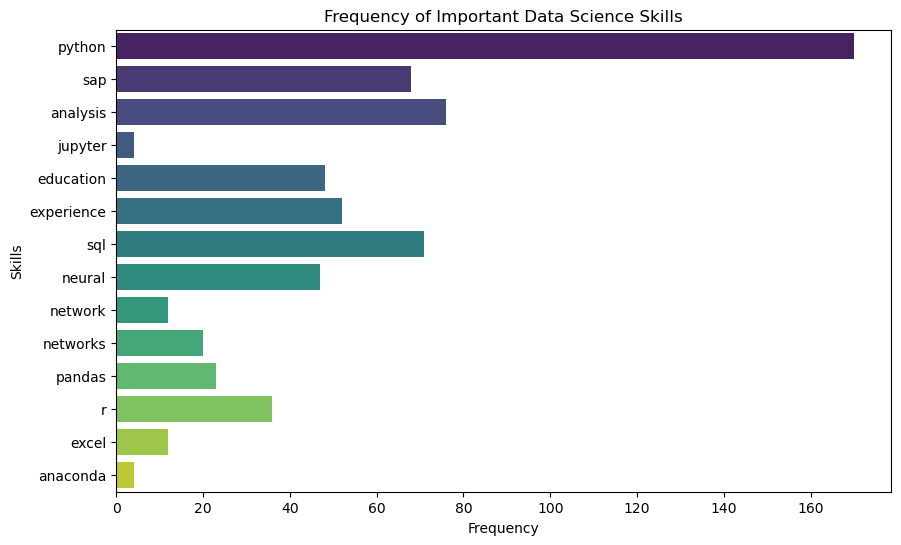

In [66]:
important_skills = ['python', 'sap', 'analysis', 'jupyter', 'education', 'experience', 'sql', 'neural', 'network', 'networks', 'pandas', 'r', 'excel', 'anaconda']

# Create a frequency distribution for important skills
skills_freq = {skill: data_science_corpus.split().count(skill) for skill in important_skills}
print(skills_freq)

# Visualize the frequencies of important skills
skills_freq_series = pd.Series(skills_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=skills_freq_series.values, y=skills_freq_series.index, palette='viridis')
plt.title('Frequency of Important Data Science Skills')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()
